<a href="https://colab.research.google.com/github/talilotarlison/5-Vb8nXmJ5Q7kZ/blob/main/Analise_dados_CafeCia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tabela de Vendas:
         Produto  Janeiro  Fevereiro  Março  Abril  Maio  Junho  Julho  \
0  Café Expresso      600        550    580    600   620    670    690   
1      Capuccino      450        430    480    460   490    520    530   
2       Salgados      320        310    340    330   350    380    390   
3          Bolos      120        140    160    150   130    140    150   
4          Doces      100        120    110     90   110    140    130   

   Agosto  Setembro  Outubro  Novembro  Dezembro  Total  
0     710       650      710       750       800   8410  
1     510       490      520       530       550   6720  
2     420       400      420       440       460   5510  
3     170       160      180       190       220   1950  
4     120       110      100       110       120   1260  


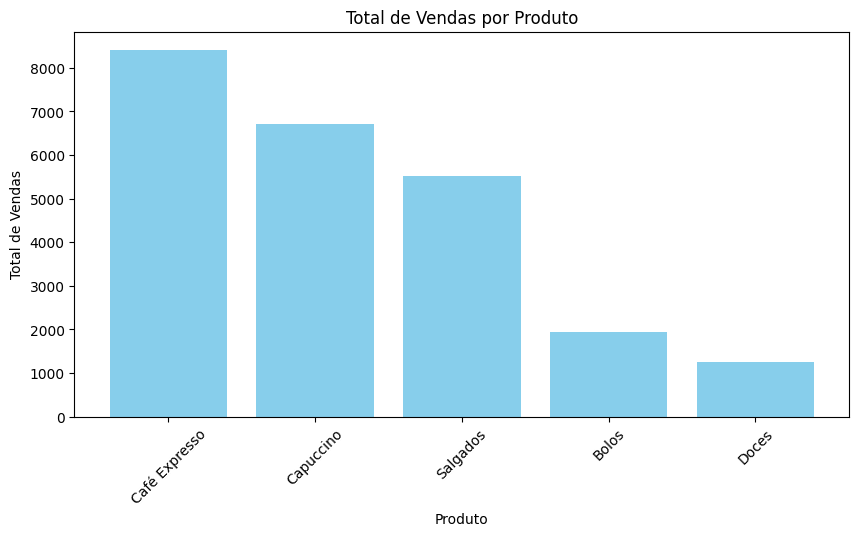

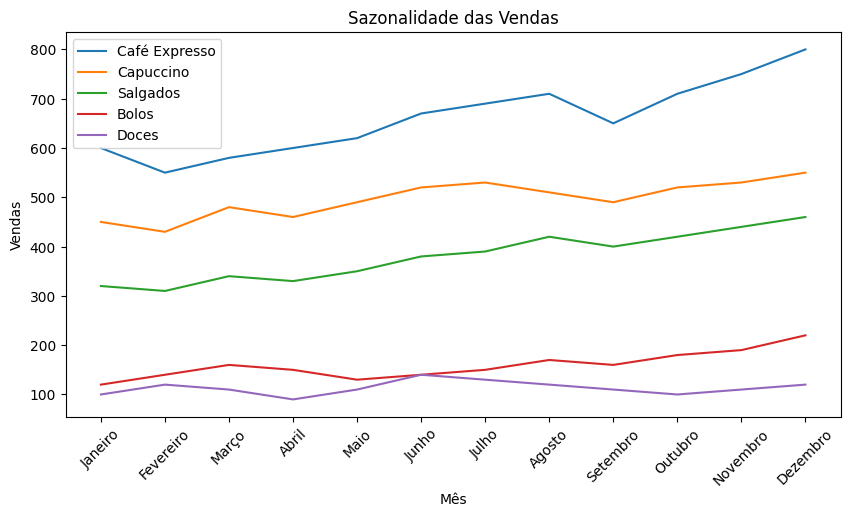

Produto mais vendido: Café Expresso
Total de vendas: 8410


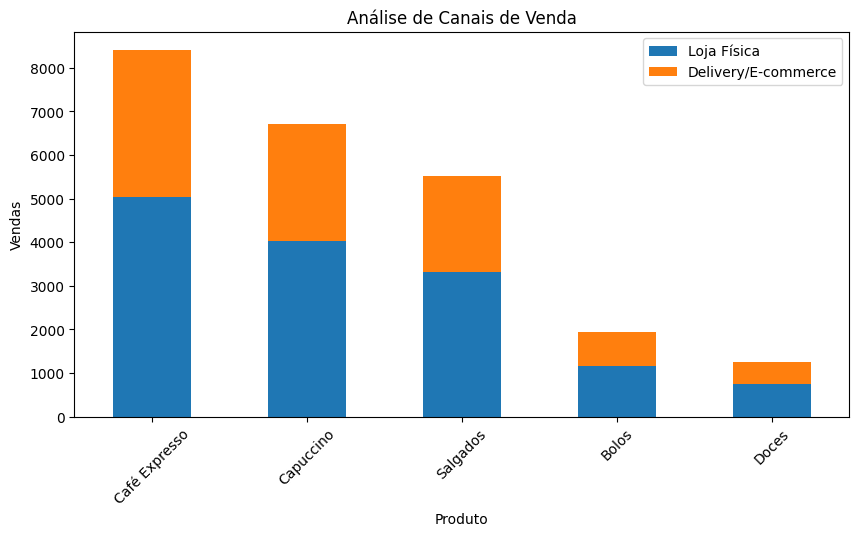

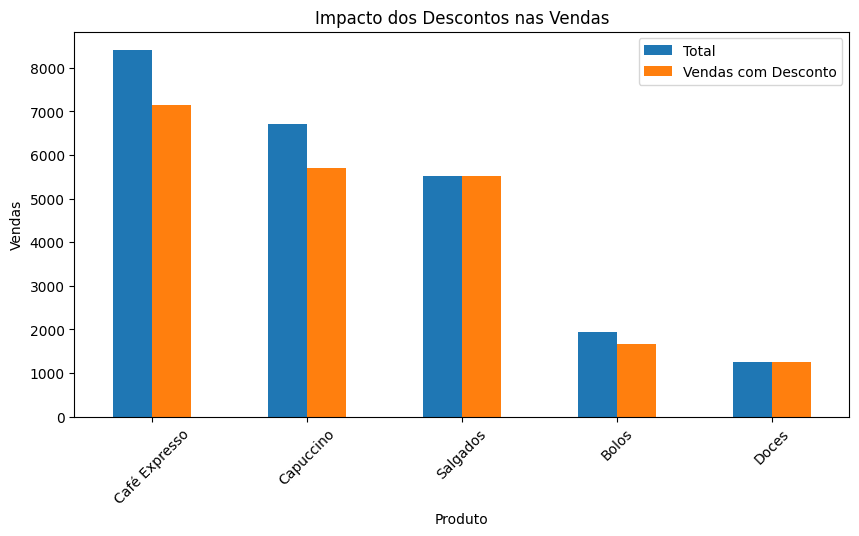

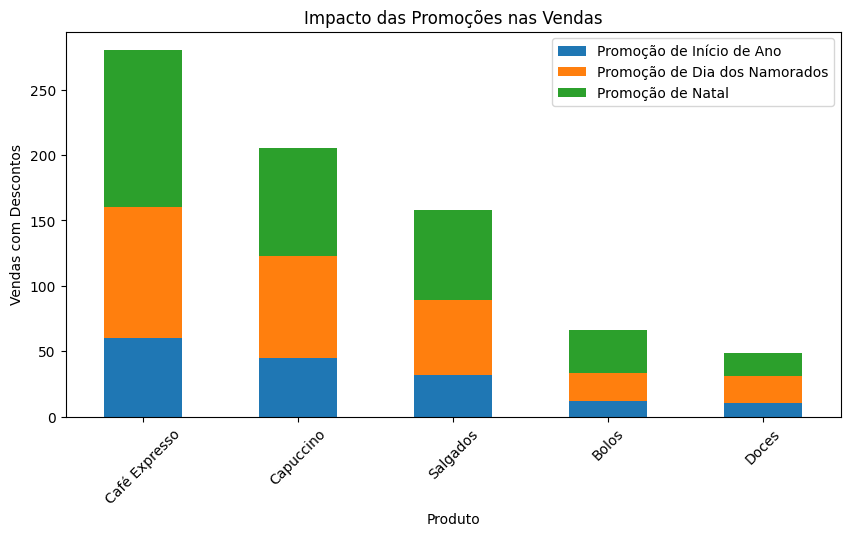

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados do CSV
df = pd.read_csv("tabela_vendas.csv")

# Exibir a tabela de vendas
print("Tabela de Vendas:")
print(df)

# Converter colunas mensais para análise numérica
meses = df.columns[1:-1]  # Exclui a coluna 'Produto' e 'Total'
df[meses] = df[meses].apply(pd.to_numeric)

def plot_vendas():
    """Gera gráfico de vendas totais por produto."""
    plt.figure(figsize=(10, 5))
    plt.bar(df['Produto'], df['Total'], color='skyblue')
    plt.xlabel("Produto")
    plt.ylabel("Total de Vendas")
    plt.title("Total de Vendas por Produto")
    plt.xticks(rotation=45)
    plt.show()

def analise_sazonalidade():
    """Gera gráfico de sazonalidade das vendas."""
    plt.figure(figsize=(10, 5))
    for produto in df['Produto']:
        plt.plot(meses, df[df['Produto'] == produto].iloc[:, 1:-1].values.flatten(), label=produto)
    plt.xlabel("Mês")
    plt.ylabel("Vendas")
    plt.title("Sazonalidade das Vendas")
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

def produto_mais_vendido():
    """Identifica o produto mais vendido."""
    mais_vendido = df.loc[df['Total'].idxmax()]
    print("Produto mais vendido:", mais_vendido['Produto'])
    print("Total de vendas:", mais_vendido['Total'])

def analise_canal_venda():
    """Análise dos canais de venda."""
    canais = {"Loja Física": 0.6, "Delivery/E-commerce": 0.4}
    df_canais = df[['Produto', 'Total']].copy()
    df_canais['Loja Física'] = df_canais['Total'] * canais["Loja Física"]
    df_canais['Delivery/E-commerce'] = df_canais['Total'] * canais["Delivery/E-commerce"]
    df_canais.drop(columns=['Total'], inplace=True)
    df_canais.plot(x='Produto', kind='bar', stacked=True, figsize=(10, 5))
    plt.title("Análise de Canais de Venda")
    plt.ylabel("Vendas")
    plt.xticks(rotation=45)
    plt.show()

def analise_descontos():
    """Análise de descontos e promoções."""
    descontos = {"Café Expresso": 0.15, "Capuccino": 0.15, "Salgados": 0.0, "Bolos": 0.15, "Doces": 0.0}
    df['Desconto Aplicado'] = df['Produto'].map(descontos)
    df['Vendas com Desconto'] = df['Total'] * (1 - df['Desconto Aplicado'])
    df.plot(x='Produto', y=['Total', 'Vendas com Desconto'], kind='bar', figsize=(10, 5))
    plt.title("Impacto dos Descontos nas Vendas")
    plt.ylabel("Vendas")
    plt.xticks(rotation=45)
    plt.show()

def analise_promocoes():
    """Análise dos impactos das promoções nas vendas."""
    df['Promoção de Início de Ano'] = df[meses[0]] * 0.10  # 10% de desconto em janeiro
    df['Promoção de Dia dos Namorados'] = df[meses[5]] * 0.15  # 15% em junho
    df['Promoção de Natal'] = df[meses[11]] * 0.15  # 15% em dezembro
    df_promocoes = df[['Produto', 'Promoção de Início de Ano', 'Promoção de Dia dos Namorados', 'Promoção de Natal']]
    df_promocoes.plot(x='Produto', kind='bar', stacked=True, figsize=(10, 5))
    plt.title("Impacto das Promoções nas Vendas")
    plt.ylabel("Vendas com Descontos")
    plt.xticks(rotation=45)
    plt.show()

# Chamando as funções
plot_vendas()
analise_sazonalidade()
produto_mais_vendido()
analise_canal_venda()
analise_descontos()
analise_promocoes()
